## Fertility Dataset EDA and Machine Learning using SVM

### Abstract: 100 volunteers provide a semen sample analyzed according to the WHO 2010 criteria. Sperm concentration are related to socio-demographic data, environmental factors, health status, and life habits

#### Data Set Characteristics:

#### Multivariate

#### Number of Instances:

100

#### Area:

Life

#### Attribute Characteristics:

Real

#### Number of Attributes:

10

#### Date Donated

2013-01-17

#### Associated Tasks:

Classification, Regression

#### Missing Values?

N/A

#### Number of Web Hits:

128756

#### Source:
David Gil,
dgil '@' dtic.ua.es,
Lucentia Research Group, Department of Computer Technology, University of Alicante

Jose Luis Girela,
girela '@' ua.es,
Department of Biotechnology, University of Alicante

#### Attribute Information:
Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1)

Age at the time of analysis. 18-36 (0, 1)

Childish diseases (ie , chicken pox, measles, mumps, polio) 1) yes, 2) no. (0, 1)

Accident or serious trauma 1) yes, 2) no. (0, 1)

Surgical intervention 1) yes, 2) no. (0, 1)

High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1)

Frequency of alcohol consumption 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never (0, 1)

Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1)

Number of hours spent sitting per day ene-16 (0, 1)

Output: Diagnosis normal (N), altered (O)

### Data Lookup & Cleaning

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import plotly.express as px

#### Reading the Dataset and assigning that to the variable df

In [2]:
df=pd.read_csv('fertility.csv')

#### Access the first 5 rows of a dataframe

In [3]:
df.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered


#### Access the last 5 rows of a dataframe

In [4]:
df.tail()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
95,winter,30,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
96,winter,29,yes,no,no,more than 3 months ago,once a week,occasional,9,Normal
97,winter,30,yes,yes,yes,more than 3 months ago,hardly ever or never,never,6,Normal
98,winter,30,yes,no,yes,more than 3 months ago,hardly ever or never,occasional,3,Normal
99,winter,30,no,yes,yes,more than 3 months ago,several times a week,never,3,Normal


#### Prints information about the DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Season                                 100 non-null    object
 1   Age                                    100 non-null    int64 
 2   Childish diseases                      100 non-null    object
 3   Accident or serious trauma             100 non-null    object
 4   Surgical intervention                  100 non-null    object
 5   High fevers in the last year           100 non-null    object
 6   Frequency of alcohol consumption       100 non-null    object
 7   Smoking habit                          100 non-null    object
 8   Number of hours spent sitting per day  100 non-null    int64 
 9   Diagnosis                              100 non-null    object
dtypes: int64(2), object(8)
memory usage: 7.9+ KB


#### Check the number of missing values in each column

In [6]:
df.isna().sum()

Season                                   0
Age                                      0
Childish diseases                        0
Accident or serious trauma               0
Surgical intervention                    0
High fevers in the last year             0
Frequency of alcohol consumption         0
Smoking habit                            0
Number of hours spent sitting per day    0
Diagnosis                                0
dtype: int64

#### Statistical Information about the DataFrame

In [7]:
df.describe()

,Age,Number of hours spent sitting per day
count,100.000000,100.000000
mean,30.110000,10.800000
std,2.246861,33.616975
min,27.000000,1.000000
25%,28.000000,5.000000
50%,30.000000,7.000000
75%,32.000000,9.000000
max,36.000000,342.000000


#### Correlation

In [8]:
df.corr()

,Age,Number of hours spent sitting per day
Age,1.000000,-0.046645
Number of hours spent sitting per day,-0.046645,1.000000


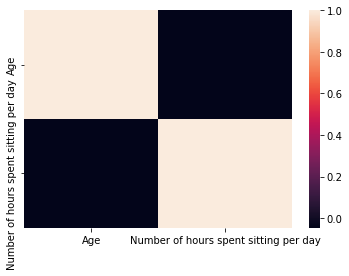

In [9]:
sns.heatmap(df.corr())
plt.show()

### Analysis of Data

#### Percentage of the Diagnosis in the dataset

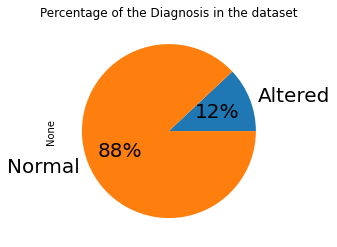

In [10]:
df.groupby('Diagnosis').size().plot(kind='pie',  textprops={'fontsize': 20},autopct='%1.0f%%')
plt.title('Percentage of the Diagnosis in the dataset')
plt.show()

#### Observation
- 88% of the people were normal
- 12% of the people were altered

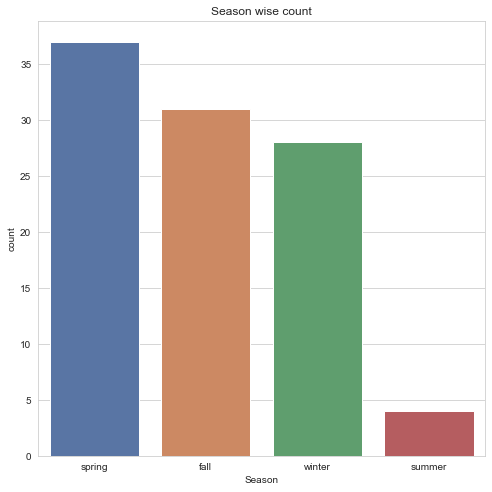

In [11]:
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Season wise count")

sns.set(font_scale=2)
sns.countplot(x='Season', data=df)
plt.show()

#### Observation
- Spring season having the highest count, followed by fall, winter and summer

#### As you know smoking is bad for your health. Let's see if it had an effect on patients.

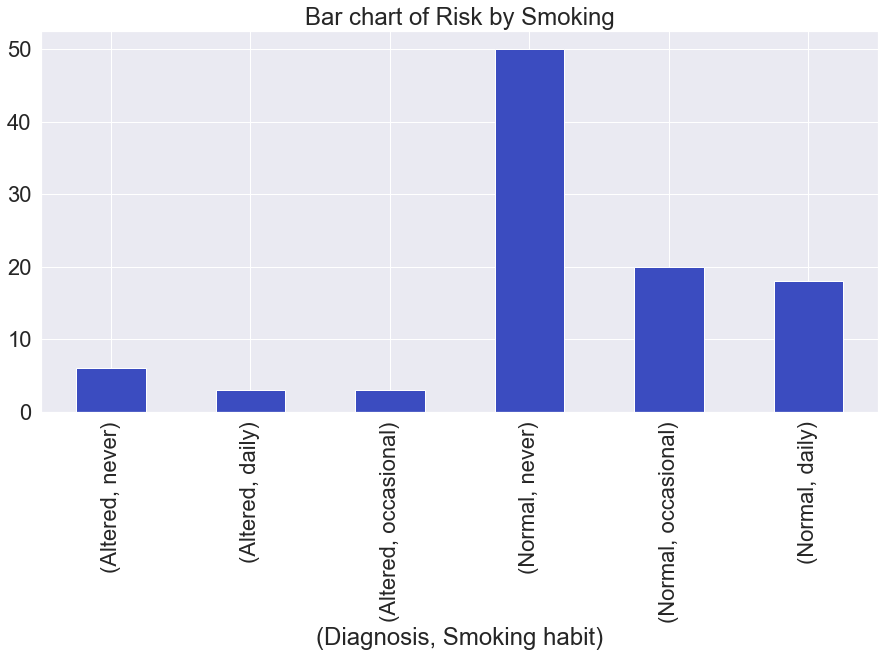

In [12]:
fig, ax = plt.subplots(figsize=(15,7))

df.groupby('Diagnosis')['Smoking habit'].value_counts().plot(ax=ax, kind='bar', 
                                                    title = 'Bar chart of Risk by Smoking', colormap = 'coolwarm')
ax.set(xlabel = "(Diagnosis, Smoking habit)")

plt.show()

#### Observation 
- This shows how many patients altered being a smoker (Altered,never)
- This shows how many patients altered being a smoker (Altered,daily)
- This shows how many patients altered being a smoker (Altered,occasional)
- This shows how many patients normal without being a smoker (Normal,never)
- This shows how many patients normal without being a smoker (Normal,occasional)
- This shows how many patients normal without being a smoker (Normal,daily)


- This clearly shows that the person without being a smoker will be cured and no side effects in the fertility rate

#### Frequency of alcohol consumption

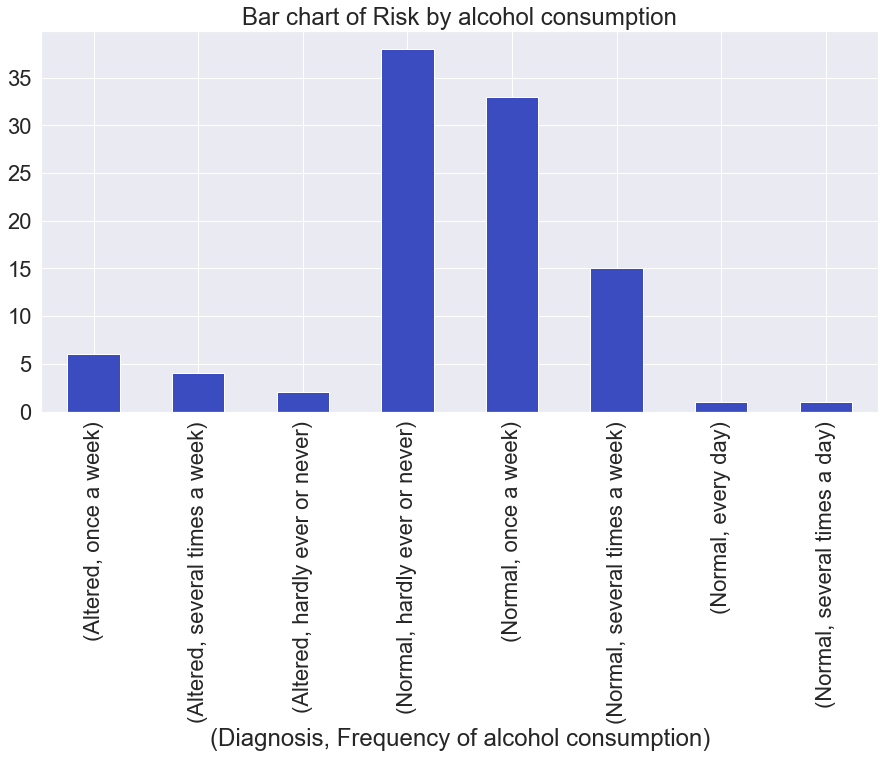

In [13]:
fig, ax = plt.subplots(figsize=(15,7))

df.groupby('Diagnosis')['Frequency of alcohol consumption'].value_counts().plot(ax=ax, kind='bar', 
                                                    title = 'Bar chart of Risk by alcohol consumption', colormap = 'coolwarm')
ax.set(xlabel = "(Diagnosis, Frequency of alcohol consumption)")

plt.show()

#### Observation
- This is clearly shows that the person drank several times a day will be affected by the fertility rate

#### Surgical intervention countwise record

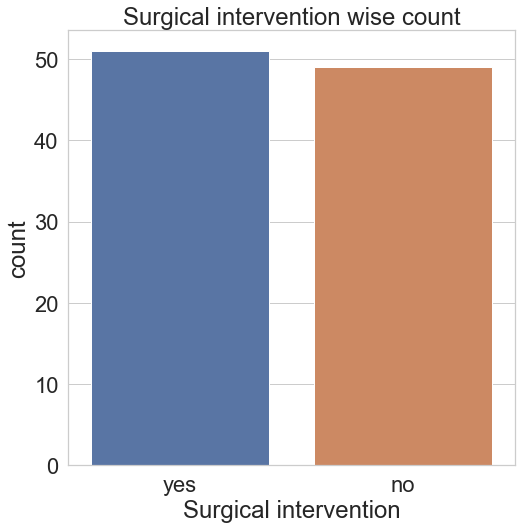

In [14]:
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Surgical intervention wise count")

sns.set(font_scale=2)
sns.countplot(x='Surgical intervention', data=df)
plt.show()

#### Observation
- This is clearly shows that the person having surgical intervention will be affected by the fertility rate

In [15]:
df.dtypes

Season                                   object
Age                                       int64
Childish diseases                        object
Accident or serious trauma               object
Surgical intervention                    object
High fevers in the last year             object
Frequency of alcohol consumption         object
Smoking habit                            object
Number of hours spent sitting per day     int64
Diagnosis                                object
dtype: object

In [16]:
df['Season'].value_counts()

spring    37
fall      31
winter    28
summer     4
Name: Season, dtype: int64

In [17]:
df.Season=df.Season.replace({"spring":1,"fall":2,"winter":3,"summer":4})

In [18]:
df['Childish diseases'].value_counts()

yes    87
no     13
Name: Childish diseases, dtype: int64

In [19]:
df['Childish diseases']=df['Childish diseases'].replace({"yes":1,"no":0})

In [20]:
df['Accident or serious trauma'].value_counts()

no     56
yes    44
Name: Accident or serious trauma, dtype: int64

In [21]:
df['Accident or serious trauma']=df['Accident or serious trauma'].replace({"yes":1,"no":0})

In [22]:
df['Surgical intervention'].value_counts()

yes    51
no     49
Name: Surgical intervention, dtype: int64

In [23]:
df['Surgical intervention']=df['Surgical intervention'].replace({"yes":1,"no":0})

In [24]:
df['High fevers in the last year'].value_counts()

more than 3 months ago    63
no                        28
less than 3 months ago     9
Name: High fevers in the last year, dtype: int64

In [25]:
df['High fevers in the last year']=df['High fevers in the last year'].replace({"more than 3 months ago":2,"no":0,"less than 3 months ago":1})

In [26]:
df['Smoking habit'].value_counts()

never         56
occasional    23
daily         21
Name: Smoking habit, dtype: int64

In [27]:
df['Smoking habit']=df['Smoking habit'].replace({"daily":1,"occasional":2,"never":0})

In [28]:
df['Frequency of alcohol consumption'].value_counts()

hardly ever or never    40
once a week             39
several times a week    19
several times a day      1
every day                1
Name: Frequency of alcohol consumption, dtype: int64

In [29]:
df['Frequency of alcohol consumption']=df['Frequency of alcohol consumption'].replace({"every day":4,"several times a day":3,"several times a week":2,"once a week":1,"hardly ever or never":0})

In [30]:
df.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,1,30,0,1,1,2,1,2,16,Normal
1,1,35,1,0,1,2,1,1,6,Altered
2,1,27,1,0,0,2,0,0,9,Normal
3,1,32,0,1,1,2,0,0,7,Normal
4,1,30,1,1,0,2,1,0,9,Altered


### Creation of a Model

#### Take the X and y value

In [31]:
x=df.drop('Diagnosis',axis=1)

In [32]:
x

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day
0,1,30,0,1,1,2,1,2,16
1,1,35,1,0,1,2,1,1,6
2,1,27,1,0,0,2,0,0,9
3,1,32,0,1,1,2,0,0,7
4,1,30,1,1,0,2,1,0,9
...,...,...,...,...,...,...,...,...,...
95,3,30,1,0,0,2,0,0,9
96,3,29,1,0,0,2,1,2,9
97,3,30,1,1,1,2,0,0,6
98,3,30,1,0,1,2,0,2,3


In [33]:
y=df.Diagnosis
y

0      Normal
1     Altered
2      Normal
3      Normal
4     Altered
       ...   
95     Normal
96     Normal
97     Normal
98     Normal
99     Normal
Name: Diagnosis, Length: 100, dtype: object

In [34]:
y.value_counts()

Normal     88
Altered    12
Name: Diagnosis, dtype: int64

#### Import the train_test_split from the sklearn

In [35]:
from sklearn.model_selection import train_test_split

#### Split the Training Dataset and Test Dataset

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

#### Import the SVM from the sklearn

In [37]:
from sklearn.svm import SVC

#### Fitting the training data to the model

In [38]:
model=SVC()
model.fit(x_train,y_train)

SVC()

### Score

In [39]:
model.score(x_train,y_train)

0.8933333333333333

In [40]:
model.score(x_test,y_test)

0.84

### Prediction

In [41]:
y_predict=model.predict(x_test)
y_predict

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal'], dtype=object)

### Accuracy

#### Import the accuracy_score from the sklearn

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,y_predict)

0.84

### Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [45]:
performance=confusion_matrix(y_test,y_predict)

In [46]:
performance

array([[ 0,  4],
       [ 0, 21]], dtype=int64)

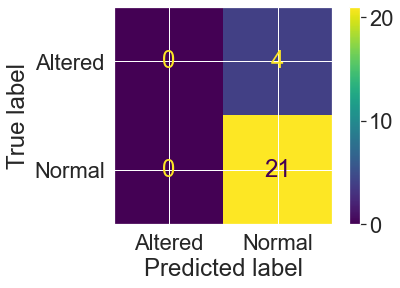

In [47]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

### Classification Report

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

     Altered       0.00      0.00      0.00         4
      Normal       0.84      1.00      0.91        21

    accuracy                           0.84        25
   macro avg       0.42      0.50      0.46        25
weighted avg       0.71      0.84      0.77        25



### Model - SVC Gamma

In [50]:
model_g=SVC(gamma=5) #Gamma 

In [51]:
model_g.fit(x_train,y_train)

SVC(gamma=5)

In [52]:
model_g.score(x_test,y_test)

0.84

### Model - rbf

In [53]:
model_rbf=SVC(kernel='rbf') #rbf
model_rbf.fit(x_train,y_train)
model_rbf.score(x_test,y_test)

0.84

### Model - poly

In [54]:
model_p=SVC(kernel='poly') #poly
model_p.fit(x_train,y_train)
model_p.score(x_test,y_test)

0.84

#### Conclusion
- The people having smoking and alcohol habits will be affected by fertility problems
- The people having surgical intervention will be affected by fertility problems
- The people having Childish diseasesand Accident or serious trauma will be affected by fertility problems
- These are the statements clearly identified in our analysis.



- Over Accuracy of the model - **84%**